**QUESTION 1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('ex1data1.txt',header=None) #as there is no column name in txt file so we tell that there is no header
data.columns=['Population(X)','Profit(Y)']         #and then define the name of the columns
data['XY']=None
data['X^2']=None
data.head()

,Population(X),Profit(Y),XY,X^2
0,6.1101,17.5920,None,None
1,5.5277,9.1302,None,None
2,8.5186,13.6620,None,None
3,7.0032,11.8540,None,None
4,5.8598,6.8233,None,None


In [2]:
#First verifying that the data has no nulls
print("Population(X)=",data['Population(X)'].isna().sum())
print("Profit(Y)=",data['Profit(Y)'].isna().sum())

Population(X)= 0
Profit(Y)= 0


In [3]:
#Checking the outliers
def Outliers(column):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  IQR=q3-q1
  upperLimit=q3+(1.5*IQR)
  lowerLimit=q1-(1.5*IQR)
  listOfOutliers=data.loc[(data[column]<lowerLimit)|(data[column]>upperLimit)]
  print(column,"=",len(listOfOutliers))
  return
Outliers('Population(X)')
Outliers('Profit(Y)')

Population(X) = 10
Profit(Y) = 9


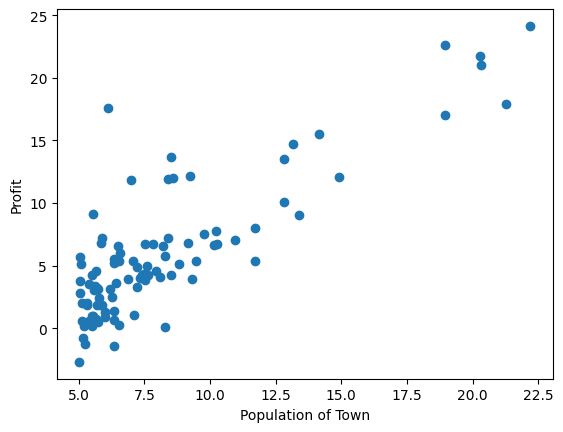

In [4]:
plt.scatter(data['Population(X)'],data['Profit(Y)'])

plt.xlabel('Population of Town')
plt.ylabel('Profit')
plt.show()

In [5]:
# X is Population
# Y is Profit
# Y'=a+bX


#XY
for i in data.index:
  data.iloc[i,2]=data.iloc[i,1]*data.iloc[i,0]
subXY=data['XY'].sum()
#X^2
for i in data.index:
  data.iloc[i,3]=data.iloc[i,0]**2
subX2=data['X^2'].sum()
#n
n=len(data.index)
#subX & subY
subX=data['Population(X)'].sum()
subY=data['Profit(Y)'].sum()
#Calculation for b
b=((n*subXY)-(subX*subY))/((n*subX2)-((subX)**2))
print("Slope(b)=",b)
#Calculation for a
a=(subY-(b*subX))/n
print("Intercept(a)=",a)

print("Y=",a,"+",b,"X")
data.head()

Slope(b)= 1.1930336441895941
Intercept(a)= -3.895780878311857
Y= -3.895780878311857 + 1.1930336441895941 X


,Population(X),Profit(Y),XY,X^2
0,6.1101,17.5920,107.488879,37.333322
1,5.5277,9.1302,50.469007,30.555467
2,8.5186,13.6620,116.381113,72.566546
3,7.0032,11.8540,83.015933,49.04481
4,5.8598,6.8233,39.983173,34.337256


<function matplotlib.pyplot.show(close=None, block=None)>

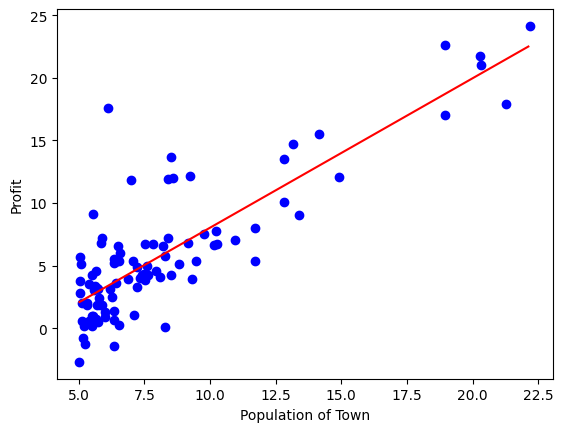

In [6]:
x_values = np.arange(min(data['Population(X)']), max(data['Population(X)']), 0.1)
y_values = a + b * x_values
plt.scatter(data['Population(X)'],data['Profit(Y)'],color='blue')
plt.xlabel('Population of Town')
plt.ylabel('Profit')
# Plot the line
plt.plot(x_values, y_values, color='red')
plt.show

**QUESTION 2**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data2 = pd.read_csv('ex1data2.txt', header=None)
data2.columns = ['Size of House(X1)', 'Number of Bedrooms(X2)', 'Price of House(Y)']
data2.head()

,Size of House(X1),Number of Bedrooms(X2),Price of House(Y)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539901


In [8]:
# Check for null values
print("Size of House =", data2['Size of House(X1)'].isna().sum())
print("Number of Bedrooms =", data2['Number of Bedrooms(X2)'].isna().sum())
print("Price of House =", data2['Price of House(Y)'].isna().sum())

Size of House = 0
Number of Bedrooms = 0
Price of House = 0


In [9]:
# Check for outliers
def outliers(column):
  q1 = data2[column].quantile(0.25)
  q3 = data2[column].quantile(0.75)
  IQR = q3 - q1
  upper_limit = IQR * 1.5 + q3
  lower_limit = IQR * 1.5 - q3
  listOfOutliers = data2.loc[(data2[column] > upper_limit) | (data2[column] < lower_limit)]
  print(column, "=", len(listOfOutliers))
  return

outliers('Size of House(X1)')
outliers('Number of Bedrooms(X2)')
outliers('Price of House(Y)')

Size of House(X1) = 3
Number of Bedrooms(X2) = 0
Price of House(Y) = 2


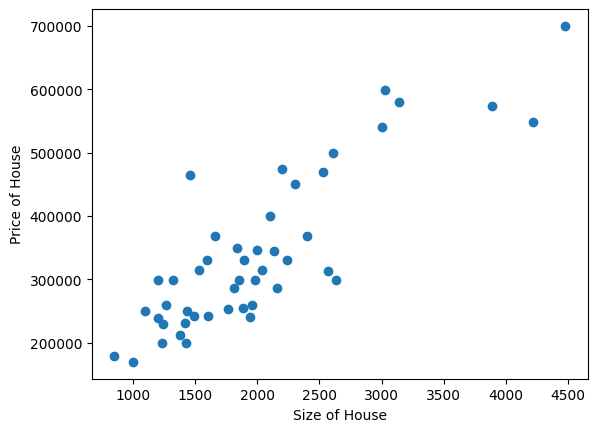

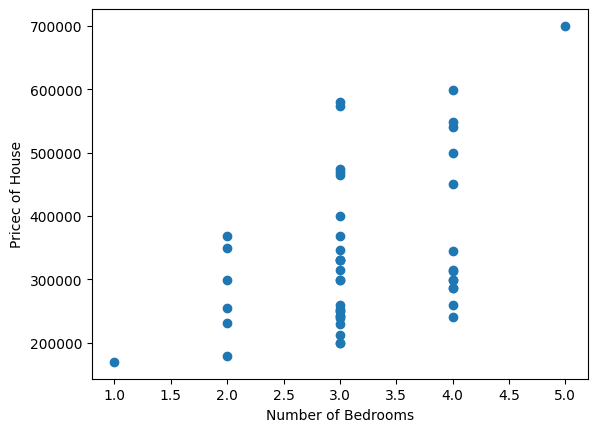

In [10]:
# Plot the data
plt.scatter(data2['Size of House(X1)'], data2['Price of House(Y)'])
plt.xlabel('Size of House')
plt.ylabel('Price of House')
plt.show()

plt.scatter(data2['Number of Bedrooms(X2)'], data2['Price of House(Y)'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Pricec of House')
plt.show()

In [11]:
data2.head()

,Size of House(X1),Number of Bedrooms(X2),Price of House(Y)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539901


In [12]:
#Creating matrix X
X=np.zeros((len(data2.index),len(data2.columns)))
for i in range(len(data2.index)):
  for j in range(len(data2.columns)-1):
    X[i,j+1]=data2.iloc[i,j]
X[:,0]=1 # For a0 value in matrix
#Creating matrix Y
Y=np.zeros((len(data2.index),1))
for i in range(len(data2.index)):
  Y[i,0]=data2.iloc[i,2]
#Theta=(Xt*X)^-1 * (Xt*Y)
Xt=X.transpose()
Theta=np.matmul(Xt,X)
Theta=np.linalg.inv(Theta)
Theta=np.matmul(Theta,Xt)
Theta=np.matmul(Theta,Y)
print(Theta)

[[89597.82828239]
 [  139.2106998 ]
 [-8738.00303701]]


In [13]:
#Y=Theta[0]+Theta[1]*X1+Theta[2]*X2
Y=Theta[0]+Theta[1]*1650+Theta[2]*3
print("Predicted value of Y=",Y)

Predicted value of Y= [293081.47383519]


**QUESTION 3**

In [19]:
data3=pd.read_excel('coin_Bitcoin.xlsx')
data3['Target']=data3['High']+data3['Low']/2
data3=data3.drop(['Open','Close','Name','Symbol'],axis=1)
# Convert the date to long format
data3["Date"] = pd.to_datetime(data3["Date"])
data3["Date"] = data3["Date"].astype("int64")
data3.head()

,SNo,Date,High,Low,Volume,Marketcap,Target
0,1,1367279999000000000,147.488007,134.000000,0.0,1.603769e+09,214.488007
1,2,1367366399000000000,146.929993,134.050003,0.0,1.542813e+09,213.954994
2,3,1367452799000000000,139.889999,107.720001,0.0,1.298955e+09,193.750000
3,4,1367539199000000000,125.599998,92.281898,0.0,1.168517e+09,171.740948
4,5,1367625599000000000,108.127998,79.099998,0.0,1.085995e+09,147.677998


In [52]:
#Cheking nulls
print("Date(X)=",data3['Date'].isna().sum())
print("Target(Y)=",data3['Target'].isna().sum())

Date(X)= 0
Target(Y)= 0


In [55]:
#Checking outliers
def Outliers(column):
  q1=data3[column].quantile(0.25)
  q3=data3[column].quantile(0.75)
  IQR=q3-q1
  upperLimit=q3+(1.5*IQR)
  lowerLimit=q1-(1.5*IQR)
  listOfOutliers=data.loc[(data3[column]<lowerLimit)|(data3[column]>upperLimit)]
  print(column,"=",len(listOfOutliers))
  return
Outliers('Date')
Outliers('Target')

Date = 0
Target = 0


Intercept(a)= 10123.115888936776
Slope(b)= 11595.66038165641
Y_pred= 10123.115888936776 + 11595.66038165641 X_test
Mean Absolute Error (MAE)= 8059.521675927741
Mean Squared Error (MSE)= 150321976.13083223


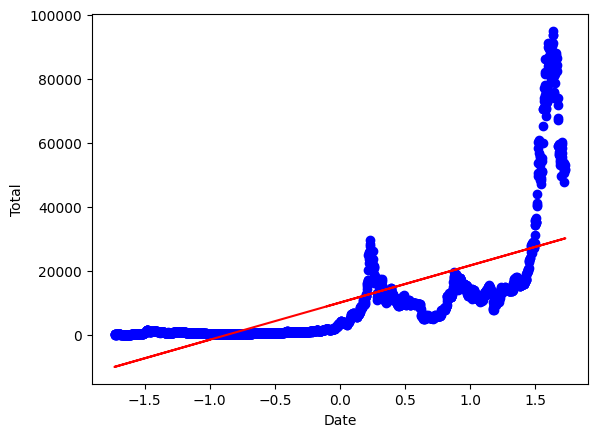

In [50]:
# Normalize the 'Date' column
dateMean = data3['Date'].mean()
dateStd = data3['Date'].std()
data3['Date'] = (data3['Date'] - dateMean) / dateStd
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data3['Date'], data3['Target'], test_size=0.3, random_state=42)
# Calculate the necessary sums for the formulas
n = len(X_train)
sum_X = X_train.sum()
sum_Y = y_train.sum()
sum_XY = (X_train * y_train).sum()
sum_X2 = (X_train**2).sum()
# Calculate b and a using the formulas
b = (n*sum_XY - sum_X*sum_Y) / (n*sum_X2 - sum_X**2)
a = (sum_Y - b*sum_X) / n
# Predict the target variable for the test set
y_pred = a + b*X_test
print("Intercept(a)=",a)
print("Slope(b)=",b)
print("Y_pred=",a,"+",b,"X_test")
# Calculate the Mean Absolute Error (MAE)
mae = sum(abs(y_test - y_pred)) / len(y_test)
print("Mean Absolute Error (MAE)=", mae)
# Calculate the Mean Squared Error (MSE)
mse = sum((y_test - y_pred)**2) / len(y_test)
print("Mean Squared Error (MSE)=", mse)
# Plot the line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show()